# Jupyter Notebook Visualisation

## Abstract

In the current project, I used open source Machine Learning libraries to build, train and compare two digit classifiers, Naive Bayes Classifier and Convolutional Neural Network. Digits are numbers from 0 to 9 accessible in MNIST dataset from the TensorFlow module. Test images are generated with NumPy and Scikit-Image modules

# Image Classifier and Test

# Evaluation Images 

### Importing needed tools

In [1]:
import skimage
import numpy as np
import matplotlib.pyplot as plt

### Creating Test Images

[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   91.  94.   0.   0.   0.   0.   0.   0.   0.   0.   0.  

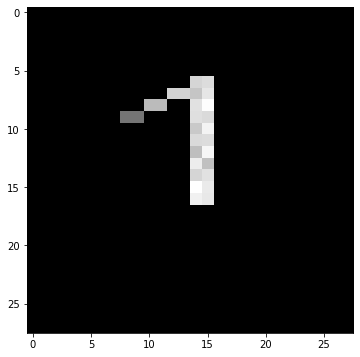

In [2]:
img_one = np.zeros([28, 28])
img_one[ 7:8, 12:16] = 90
img_one[ 8:9, 10:12] = 80 
img_one[ 9:10, 8:10] = 50 
img_one[ 6:17, 14:16] = 110 - np.random.randint(30, size=(11, 2))
print(img_one)
plt.figure('object', figsize=(10,6))
plt.imshow(img_one, cmap='gray')

[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  

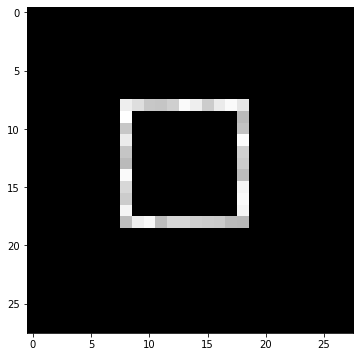

In [3]:
img_not_one = np.zeros([28, 28]) 
img_not_one [ 8:18, 8:9] = 100 - np.random.randint(30, size=(10, 1))
img_not_one [ 8:18, 18:19] = 100 - np.random.randint(30, size=(10, 1))
img_not_one [ 8:9, 8:19] = 100 - np.random.randint(30, size=(1, 11))
img_not_one [ 18:19, 8:19] = 100 - np.random.randint(30, size=(1, 11))
print(img_not_one)
plt.figure('object', figsize=(10,6))
plt.imshow(img_not_one , cmap='gray')

### Images are unrealistic, we can perform Morphological Image Operation to provide more realistic images

However morphological opening is defined in skimage module, we can perform that from scratch as erosion of dilation of image as define in "Morphological Image Analysis" Pierre Soile 

For structuring element B and set X, for:

Erosion define as:
<br>
$ \large \varepsilon_B(X) = { x | B_x \subseteq X}  $

Dilation define as:
<br>
$ \large \delta_B(X) = { x | B_x \cap X \neq \emptyset}  $

Closing of image f is defined as:
<br>
$ \large  \oslash_B(f) = \varepsilon_{\breve{B}}[\delta_B(X)] $

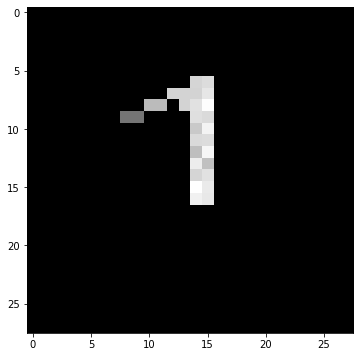

In [4]:
img_one = skimage.morphology.erosion(skimage.morphology.dilation(img_one))
plt.figure('object', figsize=(10,6))
plt.imshow(img_one , cmap='gray') 

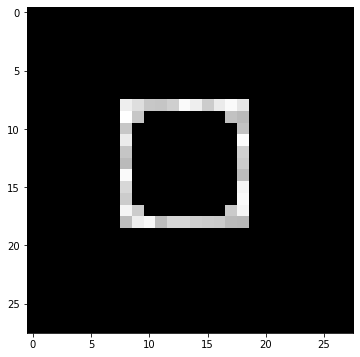

In [5]:
img_not_one = skimage.morphology.closing(img_not_one)
plt.figure('object', figsize=(10,6))
plt.imshow(img_not_one , cmap='gray') 

## Image Augmentation

Augmentation is the technique in machine learning helpful in overfitting reducing by using the amount of operation done on data. In image cases, the most popular are horizontal flips, random noises and colour inversions. 
<br> In our task we will use image augmentation only for the test task.
<br> We will use only colour inversion function because we want our classifier to recognise images of all colours, however, we don't want to treat standard and flipped numbers as the same (except for "0", "8") 

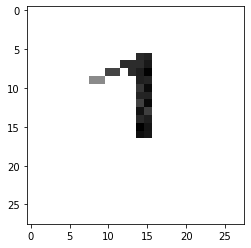

In [6]:
from skimage import util
augmented = util.invert(img_one)
plt.imshow(augmented, cmap='gray')

## Presented Class

In [7]:
class Test_Image:
    def __int__(self):
        self.is_one = []
        self.is_not_one = []
        self.augmented_one = []
        self.augmented_non_one = []
    def is_one(self):
        #Image declaration
        img_one = np.zeros([28, 28])
        img_one[ 7:8, 12:16] = 90
        img_one[ 8:9, 10:12] = 80 
        img_one[ 9:10, 8:10] = 50 
        img_one[ 6:17, 14:16] = 110 - np.random.randint(30, size=(11, 2))
        # To make Image more realistic we performe erosion of dilation of image
        self.img_one = skimage.morphology.erosion(skimage.morphology.dilation(img_one))
        return self.img_one
    def is_not_one(self):
        # Image declaration
        img_not_one = np.zeros([28, 28]) 
        img_not_one [ 8:18, 8:9] = 100 - np.random.randint(30, size=(10, 1))
        img_not_one [ 8:18, 18:19] = 100 - np.random.randint(30, size=(10, 1))
        img_not_one [ 8:9, 8:19] = 100 - np.random.randint(30, size=(1, 11))
        img_not_one [ 18:19, 8:19] = 100 - np.random.randint(30, size=(1, 11))
        # To make Image more realistic we performe erosion of dilation of image
        self.img_not_one = skimage.morphology.closing(img_not_one)
        return self.img_not_one
    def image_augmentation(self):
        #Augmentation - Colour Inversion
        self.augmented_one = util.invert(self.img_one)
        self.augmented_non_one = util.invert(self.img_not_one)
        return self.augmented_one, self.augmented_non_one

# Data Set

The MNIST (70000, 28 x 28) data set will be downloaded by TensorFlow.keras module, which provides us access to bigger data sets with higher quality data than sklearn.digits (1797, 8×8)

In [8]:
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split

Standard splitting for training and test data, what's more, necessary data reshape

In [9]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape)
print(X_test.shape)
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

(60000, 28, 28)
(10000, 28, 28)


example of data set instance

(-0.5, 27.5, 27.5, -0.5)

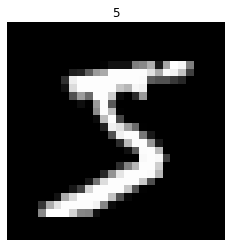

In [10]:
plt.imshow(X_train[0].reshape(28,28), cmap='gray')
plt.title(y_train[0])
plt.axis('off')

# First Model - Naive Bayes Classifier

Naive Bayes Classifier given by following formmula:

$ \Large P(y|x_1, ..., x_n) =  \frac{P(y)P(x_1,...,x_n|y)}{P(x_1,...,x_n)}$

Text(0.5, 0, 'Label')

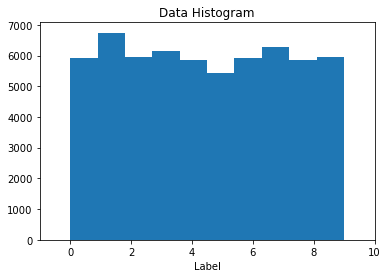

In [11]:
plt.hist(y_train)
plt.title('Data Histogram')
plt.xlim([-1, 10])
plt.xlabel("Label")

In [12]:
from sklearn.naive_bayes import MultinomialNB 
Bayesian = MultinomialNB()

In [13]:
Bayesian.fit(X_train, y_train)

MultinomialNB()

# Tests

[1]


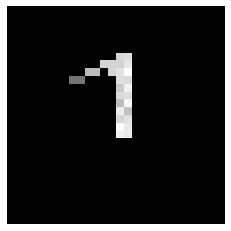

In [14]:
plt.imshow(img_one, cmap='gray')
plt.axis('off')
y_pred = Bayesian.predict(img_one.reshape(784).reshape(1, -1))
print(y_pred)

As we see our Bayes Classifier correctly classified "1"

[9]


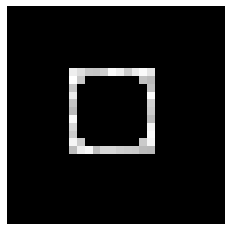

In [15]:
plt.imshow(img_not_one, cmap='gray')
plt.axis('off')
y_pred = Bayesian.predict(img_not_one.reshape(784).reshape(1, -1))
print(y_pred)

As we see our Bayes Classifier incorrectly classified "0"

In [16]:
test = Test_Image()
img_1 = test.is_one()
img_2 = test.is_not_one()
aug_1, aug_0 = test.image_augmentation()

[1]


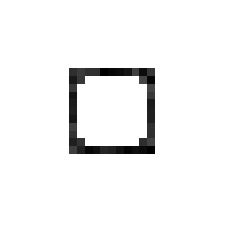

In [17]:
plt.imshow(aug_0, cmap='gray')
plt.axis('off')
y_pred = Bayesian.predict(aug_0.reshape(784).reshape(1, -1))
print(y_pred)

[0]


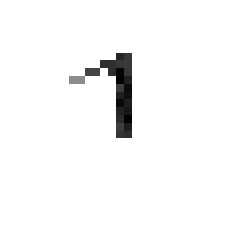

In [18]:
plt.imshow(aug_1, cmap='gray')
plt.axis('off')
y_pred = Bayesian.predict(aug_1.reshape(784).reshape(1, -1))
print(y_pred)

Here we can see that our classifier cannot correctly classify augmented (colour inversion) image

## Model I evaluation

In [19]:
from sklearn.metrics import confusion_matrix
results = confusion_matrix(y_test, Bayesian.predict(X_test))

normalisation

In [20]:
rows = results.sum(axis=1, keepdims=True)
results = results/rows

removing diagonal part 

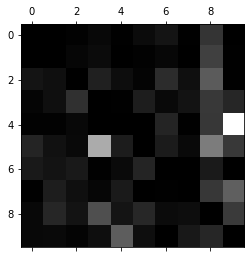

In [21]:
np.fill_diagonal(results, 0)
plt.matshow(results, cmap='gray')

In [22]:
from sklearn.metrics import accuracy_score
print('Accuracy:', accuracy_score(y_test, Bayesian.predict(X_test))*100, '%')

Accuracy: 83.65 %


We can assume our classifier is definitely not perfect and not satisfying, we can even realise that, our classifier is not able to correctly recognise 4 and 9and 5 with 3

However 83.65% accuracy seems not to be as that bad result

# Model II - Convolutional Neural Network

In [23]:
import tensorflow
import tensorflow.keras 
import keras 

The created model will be somehow "inspired" by AlexNet by Alex Krizhevsky, our Neural Network will start from the Fully Connected Layer next max-pooling layer and the sequence of the convolutional and max-pooling layer.

As a experimental setting we will start with incrising in time, very low (lower than usually dropout )

In [24]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print('X train shape:', X_train.shape)
print('Y train shape:', y_train.shape)
crit = int(X_train.shape[0] * 0.1)
print('Validation set crterion:', crit)
X_train, X_valid = X_train[:-crit], X_train[-crit:]
y_train, y_valid = y_train[:-crit], y_train[-crit:]

X train shape: (60000, 28, 28)
Y train shape: (60000,)
Validation set crterion: 6000


### Early Stopping

In [25]:
early_stopping = tensorflow.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)

In [26]:
model = keras.models.Sequential([
    keras.layers.Input(shape=[28, 28, 1]),
    keras.layers.Dense(100, activation=tensorflow.keras.activations.relu),
    keras.layers.Dropout(0.1),
    keras.layers.Conv2D(10, 6, activation=tensorflow.keras.activations.relu, padding='SAME'),
    keras.layers.Conv2D(10, 5, activation=tensorflow.keras.activations.relu,padding='SAME'),
    keras.layers.Dropout(0.3),
    keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(1, 1), padding='VALID'),
    keras.layers.Conv2D(20, 5, activation=tensorflow.keras.activations.relu, padding='SAME'),
    keras.layers.Conv2D(20, 5, activation=tensorflow.keras.activations.relu,padding='SAME'),
    keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(1, 1), padding='valid'),
    keras.layers.Conv2D(40, 4, activation=tensorflow.keras.activations.relu, padding='SAME'),
    keras.layers.Conv2D(40, 4, activation=tensorflow.keras.activations.relu,padding='SAME'),
    keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(1, 1), padding='valid'),
    keras.layers.Dropout(0.4),
    keras.layers.Conv2D(80, 3, activation=tensorflow.keras.activations.relu, padding='SAME'),
    keras.layers.Conv2D(80, 3, activation=tensorflow.keras.activations.relu,padding='SAME'),
    keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(1, 1), padding='valid'),
    keras.layers.Dropout(0.5),
    keras.layers.Conv2D(160, 3, activation=tensorflow.keras.activations.relu, padding='SAME'),
    keras.layers.Conv2D(160, 2, activation=tensorflow.keras.activations.relu,padding='SAME'),
    keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(1, 1), padding='valid'),
    keras.layers.Dense(60, tensorflow.keras.activations.relu),
    keras.layers.Flatten(),
    keras.layers.Dense(30, tensorflow.keras.activations.relu),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, tensorflow.keras.activations.softmax)
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
model.summary()

2022-07-22 15:25:22.670950: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 28, 28, 100)       200       
                                                                 
 dropout (Dropout)           (None, 28, 28, 100)       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 10)        36010     
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 10)        2510      
                                                                 
 dropout_1 (Dropout)         (None, 28, 28, 10)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 10)       0         
 )                                                               
                                                        

## Model Training

As we know model trarining can take huge amount of resources, because of that I decided to train my model at GPU with Google Colab and here, only load trained model, which is the same as model above

In [27]:
'''
history = model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=20, callbacks=[early_stopping] )
model.save('Model.CNN')'''

"\nhistory = model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=20, callbacks=[early_stopping] )\nmodel.save('Model.CNN')"

In [28]:
model = keras.models.load_model('Model.CNN')

## Model Evaluation

In [29]:
score = model.evaluate(X_test, y_test)

313/313 [==============================] - 82s 261ms/step - loss: 0.0615 - accuracy: 0.9847


Accuracy of our Convolutional Model is 98.47% what in my opinion good result and we can test our model at test data.

# Test

Our model was almost 100% sure about label

[[1.1402054e-07 9.9957830e-01 3.6145971e-04 6.2801946e-06 3.5927769e-06
  6.1299239e-08 1.0413911e-06 3.4850909e-05 6.6660377e-06 7.6410397e-06]]


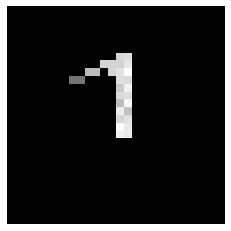

In [35]:
plt.imshow(img_one, cmap='gray')
plt.axis('off')
y_pred = model.predict(img_one.reshape([1, 28, 28]))
print(y_pred)

Model is in 83.6% sure about "0" label

[[0.8360763  0.02882322 0.02364549 0.00454202 0.00934357 0.00323052
  0.02292424 0.00800825 0.04516688 0.01823949]]


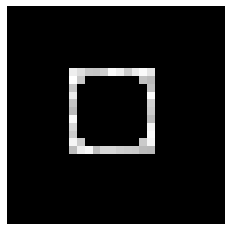

In [36]:
plt.imshow(img_not_one, cmap='gray')
plt.axis('off')
y_pred = model.predict(img_not_one.reshape([1, 28, 28]))
print(y_pred)

Model isn't really sure about label, however final result is "9"

tf.Tensor(
[[0.03149673 0.10092541 0.06100937 0.0290272  0.17388873 0.0354703
  0.00391243 0.10673419 0.18623327 0.27130237]], shape=(1, 10), dtype=float32)


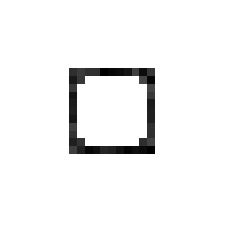

In [37]:
plt.imshow(aug_0, cmap='gray')
plt.axis('off')
y_pred = model(aug_0.reshape([1, 28, 28]))
print(y_pred)

Model didn't meet expectations and classifia our 1 as "7"

tf.Tensor(
[[2.75764744e-08 2.75892913e-02 1.49393907e-06 1.70621062e-09
  9.33068931e-01 9.58771551e-09 1.18763186e-04 9.07552385e-06
  6.07279326e-05 3.91517170e-02]], shape=(1, 10), dtype=float32)


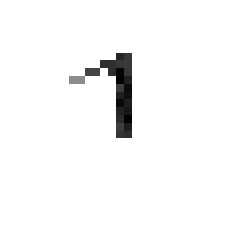

In [39]:
plt.imshow(aug_1, cmap='gray')
plt.axis('off')
y_pred = model(aug_1.reshape([1, 28, 28]))
print(y_pred)

# Results

I presented two models, one basic statistical approach and one convolutial neural approach, CNN is performing vast better, however cannot deal with augmented images.
Idea for the model imporvment is creating new dataset with augmented pictures, what supposed to cause less insensitive for colours model.

## Camera

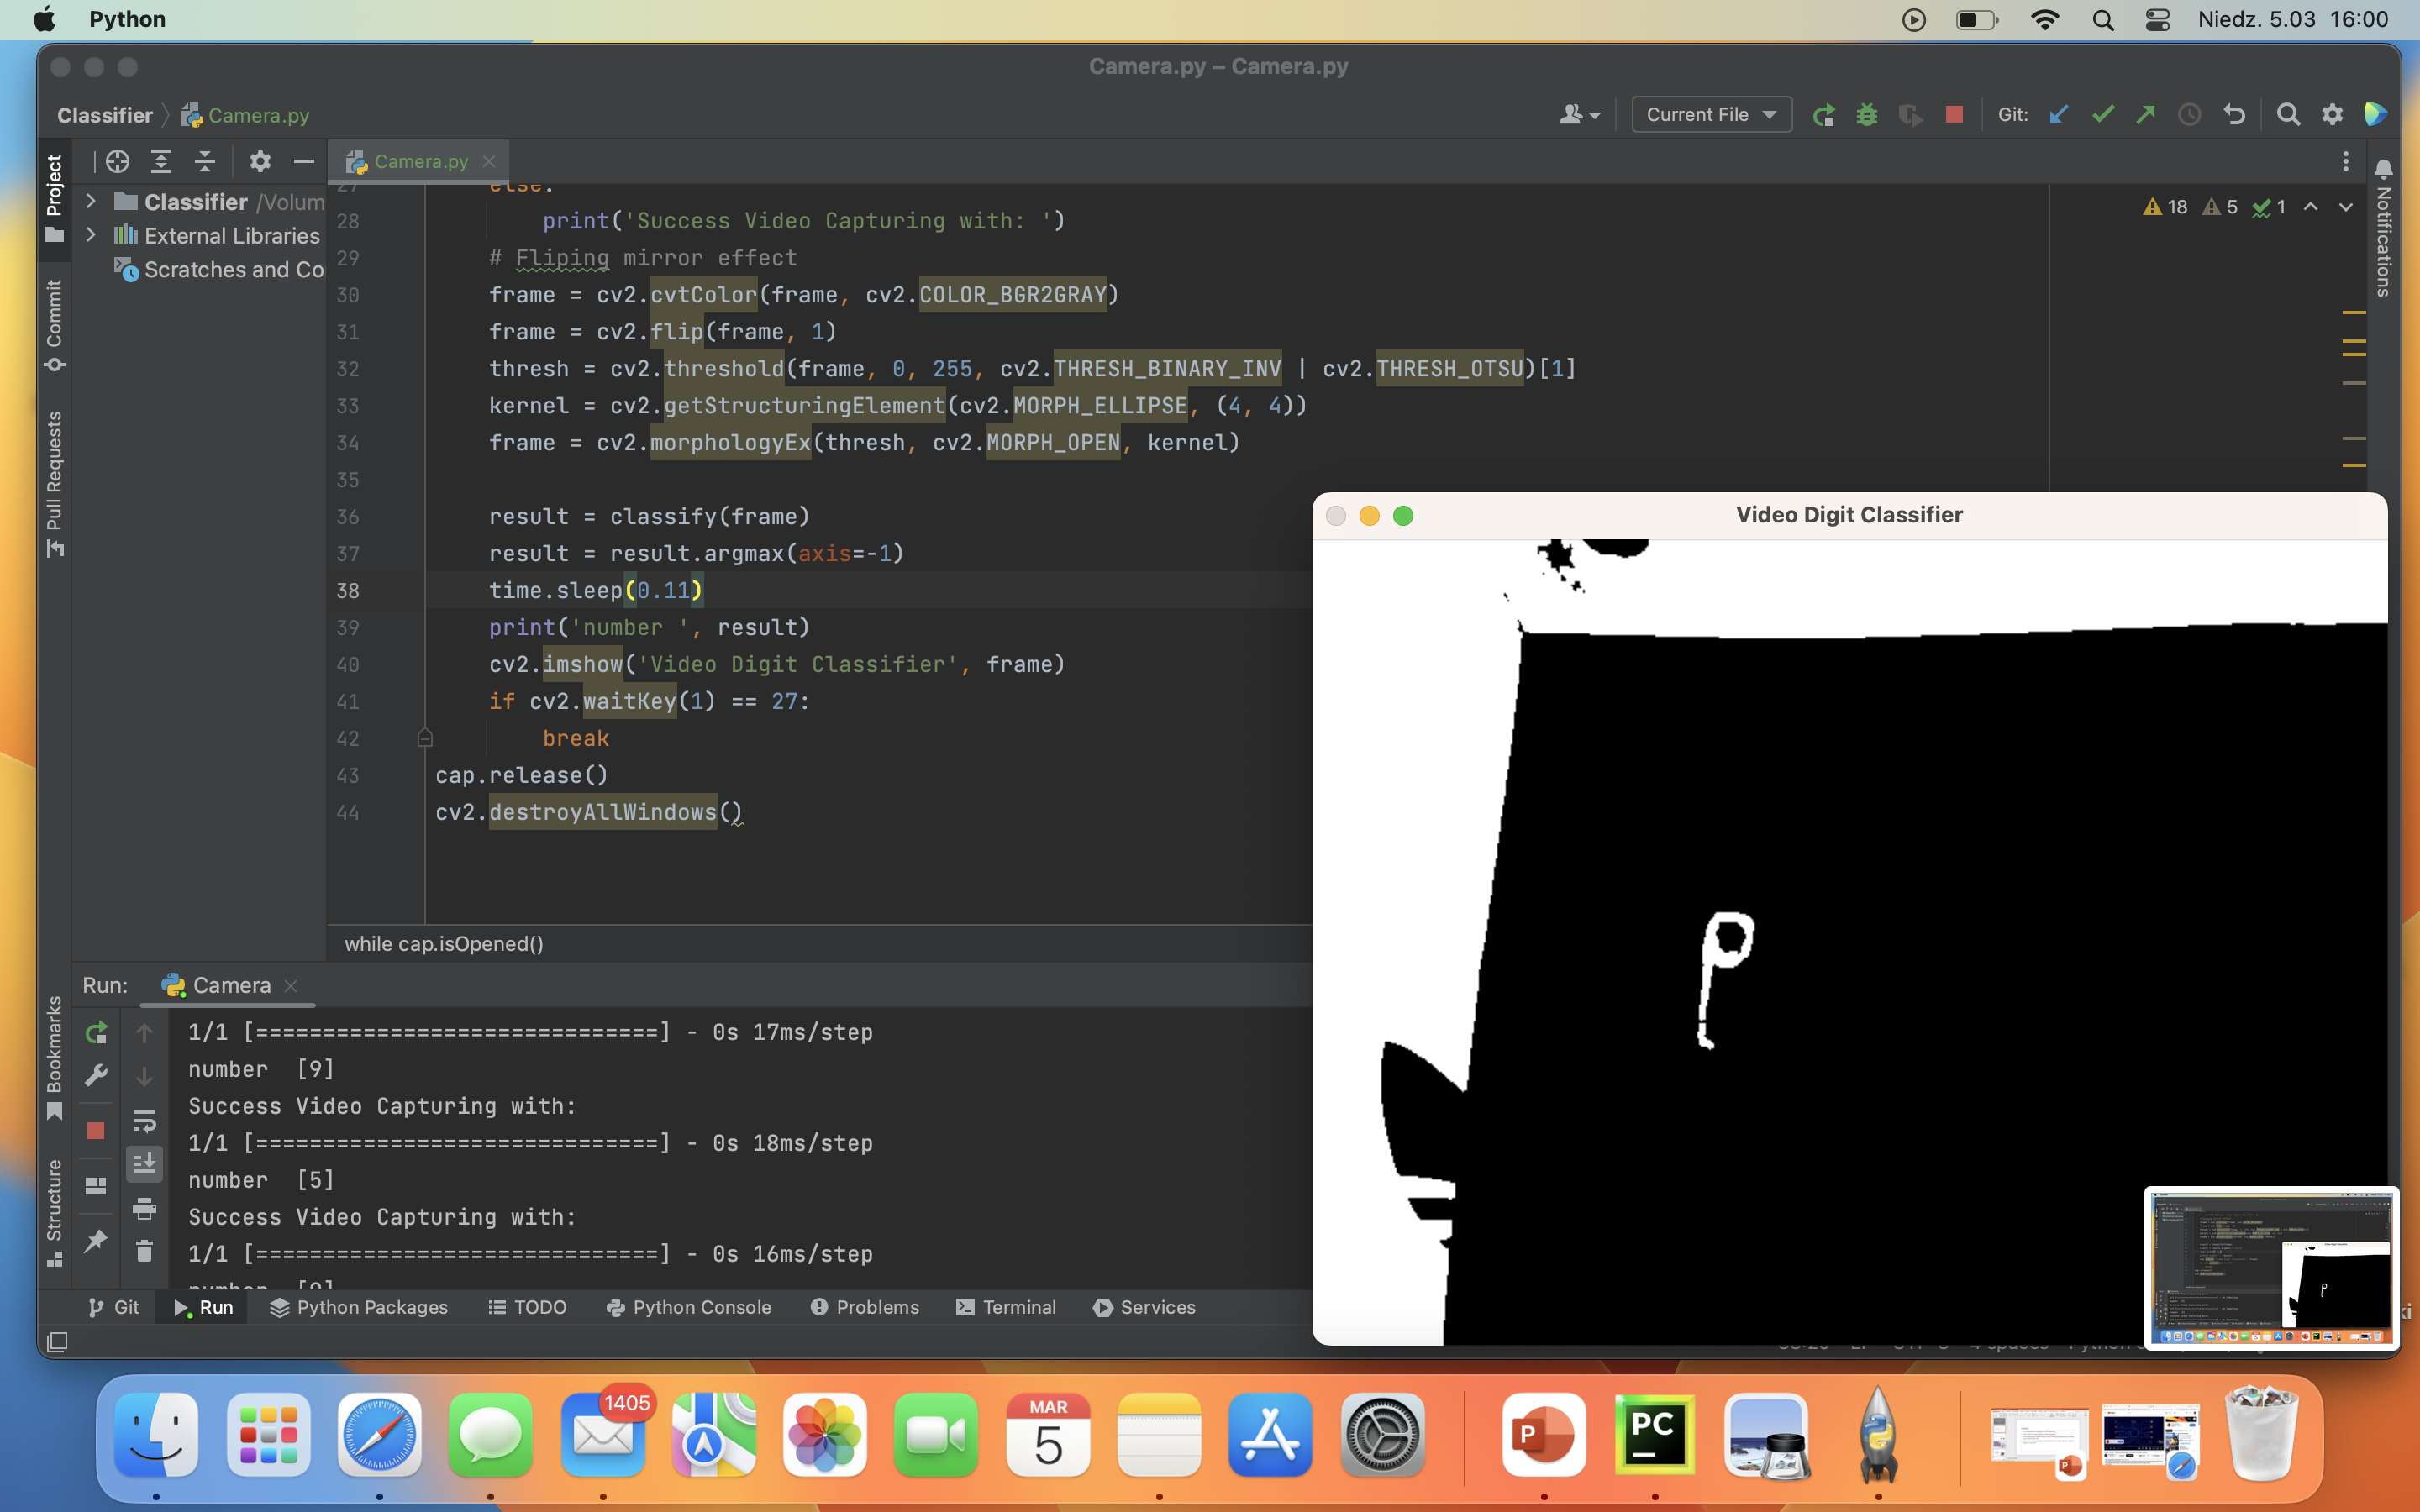

Camera classifere is highly unsatisfactory, however is highly dependet on lighing and stage, and it's possible to work in te better conditions 

# References

Pierre Soile, Morphological Image Analysis
Principles and Applications: https://link.springer.com/book/10.1007/978-3-662-03939-7

MNIST Dataset: http://yann.lecun.com/exdb/mnist/

AlexNet by Alex Krizhevsky: https://scholar.google.com/citations?user=xegzhJcAAAAJ&hl=en